# Import libraries and load dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay

Telcom = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
Telcom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# check the properties of the dataset
Telcom.describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [3]:
# check number of rows and columns
Telcom.shape

(3333, 21)

In [4]:
# check the columns in the dataset
Telcom.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
# Convert all to snake_case (recommended for Pandas)
Telcom.columns = (
    Telcom.columns
    .str.lower()           # Convert to lowercase
    .str.replace(' ', '_') # Replace spaces with underscores
)
Telcom.columns = Telcom.columns.str.replace('total_', '')
#Replacing abbreviations with entire words
Telcom.columns = Telcom.columns.str.replace('vmail', 'voice_mail').str.replace('intl', 'international')


In [6]:
# chck the percentage of missing values in each column
(Telcom.isnull().mean())*100

state                         0.0
account_length                0.0
area_code                     0.0
phone_number                  0.0
international_plan            0.0
voice_mail_plan               0.0
number_voice_mail_messages    0.0
day_minutes                   0.0
day_calls                     0.0
day_charge                    0.0
eve_minutes                   0.0
eve_calls                     0.0
eve_charge                    0.0
night_minutes                 0.0
night_calls                   0.0
night_charge                  0.0
international_minutes         0.0
international_calls           0.0
international_charge          0.0
customer_service_calls        0.0
churn                         0.0
dtype: float64

In [7]:
# check for duplicates
Telcom.duplicated().sum()

0

In [8]:
Telcom.describe().T# Descriptive statistics for numerical columns

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_voice_mail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [9]:
# check for more information about the dataset
Telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3333 non-null   object 
 1   account_length              3333 non-null   int64  
 2   area_code                   3333 non-null   int64  
 3   phone_number                3333 non-null   object 
 4   international_plan          3333 non-null   object 
 5   voice_mail_plan             3333 non-null   object 
 6   number_voice_mail_messages  3333 non-null   int64  
 7   day_minutes                 3333 non-null   float64
 8   day_calls                   3333 non-null   int64  
 9   day_charge                  3333 non-null   float64
 10  eve_minutes                 3333 non-null   float64
 11  eve_calls                   3333 non-null   int64  
 12  eve_charge                  3333 non-null   float64
 13  night_minutes               3333 

In [10]:
# check for number of rows and columns
Telcom.shape

(3333, 21)

In [11]:
# check the unique values in the 'churn' column
print(Telcom['churn'].unique())

[False  True]


In [12]:
Telcom.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_voice_mail_messages,day_minutes,day_calls,day_charge,...,eve_calls,eve_charge,night_minutes,night_calls,night_charge,international_minutes,international_calls,international_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Preprocessing

In [13]:
# binary encoding for churn
Telcom['churn'] = Telcom['churn'].replace({False: 0, True: 1})

In [14]:
# print to verify the changes
Telcom['churn'].unique()

array([0, 1], dtype=int64)

In [15]:
# drop the 'phone_number' column as it is not useful for analysis
Telcom .drop(columns=['phone_number'], inplace=True, errors= 'ignore')


In [16]:
# Convert categorical binary (yes & no) to numerical (1 & 0) for the entire dataset
Telcom.replace({'yes': 1, 'no': 0}, inplace=True)

In [17]:
# print the first few rows to verify the changes
Telcom.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_voice_mail_messages,day_minutes,day_calls,day_charge,eve_minutes,eve_calls,eve_charge,night_minutes,night_calls,night_charge,international_minutes,international_calls,international_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [18]:
# Identify categorical columns for one-hot encoding
Cat_columns = Telcom.select_dtypes(include=['object']).columns
Cat_columns

Index(['state'], dtype='object')

In [19]:
# One-hot encode categorical variables
econded_df = pd.get_dummies(Telcom, columns=Cat_columns, drop_first=True,dtype='int')
econded_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_voice_mail_messages,day_minutes,day_calls,day_charge,eve_minutes,eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


# Select features and the target variable churn

In [20]:
# select target variable 'churn'
y = Telcom['churn']
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [21]:
# Drop the target variable 'churn' from the features
x= econded_df.drop(columns=['churn'], axis=1)
x

,account_length,area_code,international_plan,voice_mail_plan,number_voice_mail_messages,day_minutes,day_calls,day_charge,eve_minutes,eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,...,0,0,0,0,0,0,0,0,0,0


# Split data for training and testing

In [22]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [24]:
# fit a logistic regression model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(scaled_x_train, y_train)
y_pred = logreg.predict(scaled_x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.75      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.77      0.68       667
weighted avg       0.86      0.78      0.81       667



# Model Evaluation using accuracy and confusion matrix

Accuracy: 0.78

Confusion Matrix:


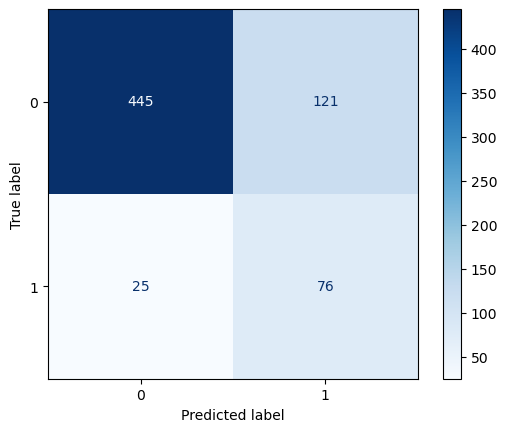


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.75      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.77      0.68       667
weighted avg       0.86      0.78      0.81       667

account_length: 0.05
area_code: 0.10
international_plan: 0.74
voice_mail_plan: -0.72
number_voice_mail_messages: 0.33
day_minutes: 0.34
day_calls: 0.02
day_charge: 0.34
eve_minutes: 0.17
eve_calls: 0.00
eve_charge: 0.15
night_minutes: 0.08
night_calls: -0.04
night_charge: 0.07
international_minutes: 0.07
international_calls: -0.15
international_charge: 0.13
customer_service_calls: 0.79
state_AL: -0.10
state_AR: 0.09
state_AZ: -0.03
state_CA: 0.17
state_CO: 0.05
state_CT: 0.09
state_DC: 0.10
state_DE: 0.04
state_FL: 0.07
state_GA: 0.09
state_HI: -0.05
state_IA: 0.00
state_ID: 0.04
state_IL: -0.04
state_IN: 0.09
state_KS: 0.13
state_KY: 0.08
s

In [25]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')
print('\nConfusion Matrix:')
cfm = confusion_matrix(y_test, y_pred)
dfm = ConfusionMatrixDisplay(confusion_matrix=cfm)
dfm.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Feature importance
feature_names = x
coefs = logreg.coef_[0]
for name, coef in zip(feature_names, coefs):
    print(f'{name}: {coef:.2f}')

# Finding out which features influenced churn the most

In [26]:
# Sort coefficients by importance
coefficients = pd.Series(logreg.coef_[0], index=x.columns)
print(coefficients.sort_values(ascending=False))

customer_service_calls        0.793819
international_plan            0.743805
day_charge                    0.341242
day_minutes                   0.338856
number_voice_mail_messages    0.328595
                                ...   
state_VT                     -0.071916
state_ND                     -0.092641
state_AL                     -0.102340
international_calls          -0.152825
voice_mail_plan              -0.722890
Length: 68, dtype: float64


# parameter hypertuning using Gridsearchcv

In [27]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Use liblinear for small datasets & L1 support
    'class_weight': [None, 'balanced']  # Try handling imbalance
}

# Initialize model
model = LogisticRegression()

# Grid search with 5-fold CV
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='f1',  # Use F1-score to balance precision and recall
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

# Fit the grid search to training data
grid.fit(scaled_x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=1)

In [28]:
# print best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best F1-Score on Training CV:", grid.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-Score on Training CV: 0.469336117020421


In [29]:
# Evaluate the best model on the test set
best_model = grid.best_estimator_
y_pred = best_model.predict(scaled_x_test)
y_proba = best_model.predict_proba(scaled_x_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       566
           1       0.39      0.79      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.79      0.69       667
weighted avg       0.87      0.78      0.81       667

Confusion Matrix:
 [[442 124]
 [ 21  80]]
ROC-AUC Score: 0.8273274323898822


# MODEL 2: DECISION TREE CLASSIFIER

In [30]:
#create and train the decision tree model
clf_model= DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_model.fit(x_train, y_train)

print(f"   • Tree depth: {clf_model.get_depth()}")
print(f"   • Number of leaves: {clf_model.get_n_leaves()}")

   • Tree depth: 3
   • Number of leaves: 8


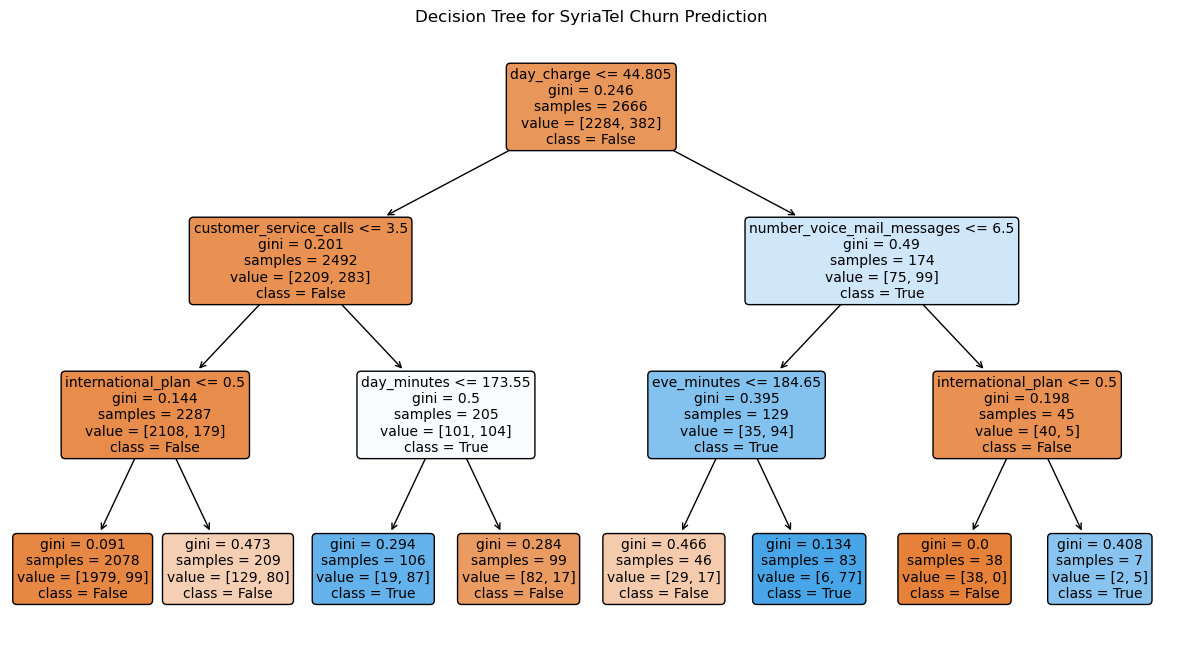

In [31]:
#Visualize the decision tree
plt.figure(figsize=(15,8))
plot_tree(clf_model,
          feature_names=x.columns,
          class_names=["False", "True"],  # Label for churn classes
          filled= True,
          rounded= True,
          fontsize=10)
plt.title("Decision Tree for SyriaTel Churn Prediction")
plt.show()

In [32]:
#Test the model
y_pred = clf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Performance:")
print(f"   • Accuracy: {accuracy:.1%}")
print(f"   • This means we got {accuracy:.1%} of predictions right!")


Model Performance:
   • Accuracy: 89.4%
   • This means we got 89.4% of predictions right!


# Hyperparameter tuning to find the best tree

In [33]:
#Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [34]:
# Initialize the model
model = DecisionTreeClassifier(random_state=42)

In [35]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

In [36]:
# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [37]:
# Get the best estimator from the grid search
best_tree = grid_search.best_estimator_

print("Best Parameters Found:")
print(grid_search.best_params_)

Best Parameters Found:
{'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [38]:
# Evaluate the best model on the test set
y_pred_best = best_tree.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.9460269865067467
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.71      0.80       101

    accuracy                           0.95       667
   macro avg       0.93      0.85      0.88       667
weighted avg       0.94      0.95      0.94       667



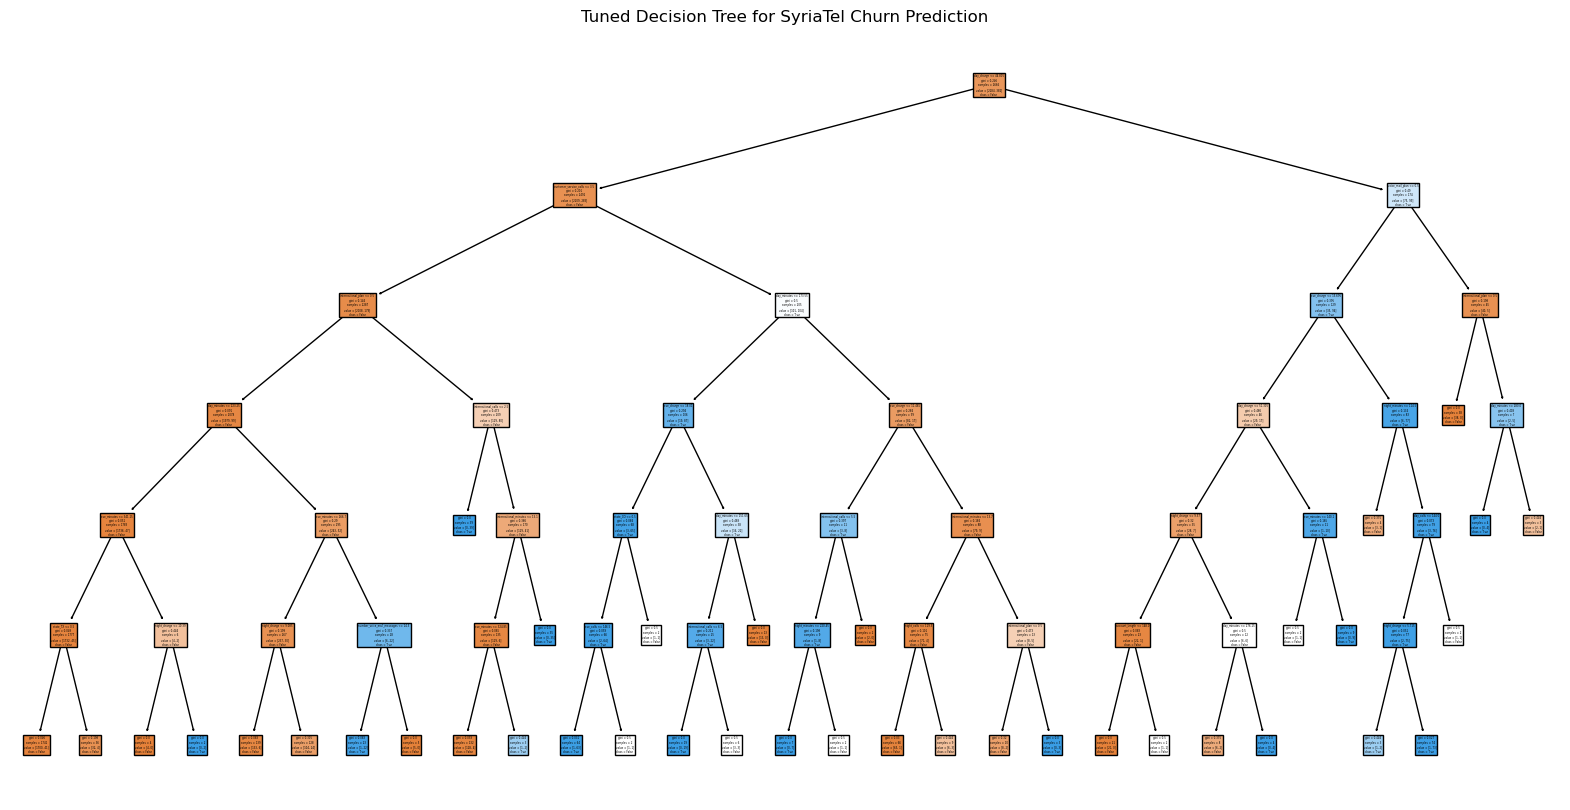

In [39]:
# Visualize the tuned decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=x.columns, class_names=["False", "True"], filled=True)
plt.title("Tuned Decision Tree for SyriaTel Churn Prediction")
plt.show()

# Concusion
The first decision tree is very easy to read and interpret to the stakeholders while the second is very complex,has a high risk to overfitting and suitable to technicals